# Exercise B - SVM flexibility with Batman dataset
## Header

In [63]:
import numpy as np

# So that changes to the a2 model are reflected here.
import a3
import importlib
importlib.reload(a3)
import a3
from sklearn.svm import SVC
from matplotlib import pyplot as plt

## Part 1 - Load & extract from dataset

In [64]:
# Load data from "bm.csv".
data = np.loadtxt("datasets/bm.csv", delimiter=",")
X = data[:, (0,1)]
y = data[:, 2]

# Shuffle and slice data.
np.random.seed(7)
n_s = 5000
r = np.random.permutation(len(y))
X, y = X[r, :], y[r]
X_s, y_s = X[:n_s, :], y[:n_s]

## Part 2 - Train support vector machine

In [65]:
clf = SVC(C=20, gamma=.75)
clf.fit(X_s, y_s)

error = (clf.predict(X_s) - y_s)**2
error = np.sum(error)/n_s

## Part 3 - Plot support vectors and boundaries

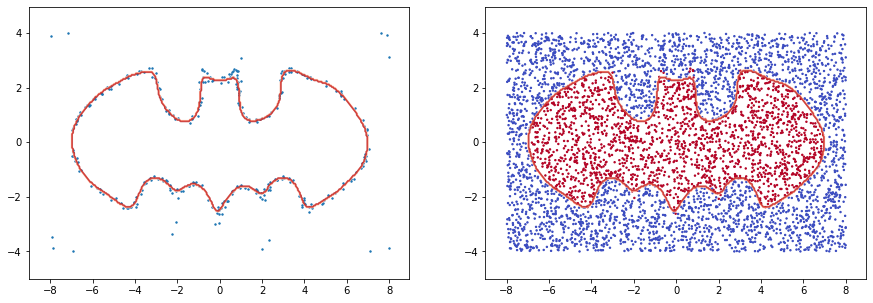

In [66]:
# Subplots.
fig = plt.figure(figsize=(15,5))

for plot in range(1,3):
    ax = fig.add_subplot(1,2,plot)

    # Plot support vectors
    if plot == 1:
        vectors = clf.support_vectors_
        ax.scatter(vectors[:, 0], vectors[:, 1], 2)

    # Plot all points
    elif plot == 2:
        ax.scatter(X_s[:, 0], X_s[:, 1], 2, c=y_s, cmap='coolwarm')

    # Decision boundaries.
    x_min, x_max, x_step = -9, 9, 0.05
    y_min, y_max, y_step = -5, 5, 0.05
    xx, yy = np.meshgrid(np.arange(x_min, x_max, x_step), np.arange(y_min, y_max, y_step))
    zz = np.zeros(xx.shape)

    for i in range(zz.shape[0]):
        for j in range(zz.shape[1]):
            test = np.array([[xx[i,j], yy[i,j]]])
            zz[i, j] = clf.predict(test)

    ax.contour(xx, yy, zz, alpha=0.4, cmap="Reds")